# CASTOR tutorial
In this notebook, we present simple tutorial that explain how to use CASTOR code. The first part is about linear case while the second presents the non linear.

In [1]:
import pandas as pd
import numpy as np
import torch
from data_generation import simulate_regime_MTS
from utils import identity, relu,leaky_relu
import matplotlib.pyplot as plt
import networkx as nx
from CASTOR import CASTOR

# Generate linear SEM:

In [11]:
g_list,df_total, intra_nodes, inter_nodes = simulate_regime_MTS(regime= 3,
                                                            func_l = [identity, identity, identity],
                                                            num_nodes = 5,
                                                            n_samples= [300,200,500],
                                                            p = 1,
                                                            degree_intra = 4,
                                                            degree_inter = 1,
                                                            graph_type_intra = "barabasi-albert",
                                                            graph_type_inter = "erdos-renyi",
                                                            sem_type = "linear-gauss",
                                                            noise_scale = 1,
                                                            ANM_type = "Linear",
                                                            max_data_gen_trials= 1000,
                                                                           )

In [12]:
n_nodes = 5
lag = False
if lag == True:
            rearange_intra = [str(i)+"_lag0" for i in range(n_nodes)]
            rearange_inter1 = [str(i)+"_lag1" for i in range(n_nodes)]
            rearange_inter2 = [str(i)+"_lag2" for i in range(n_nodes)]
            rearange_inter = rearange_inter1 + rearange_inter2
else:
            rearange_intra = [str(i)+"_lag0" for i in range(n_nodes)]
            rearange_inter = [str(i)+"_lag1" for i in range(n_nodes)]

In [13]:
X_syn = df_total[rearange_intra].to_numpy()
X_lag_syn = df_total[rearange_inter].to_numpy()
data = pd.DataFrame(X_syn)

# Run linear CASTOR:

In [17]:
castor = CASTOR(data, X_syn, X_lag_syn, lags = 2)

In [20]:
import warnings
warnings.filterwarnings('ignore')
model_n,graphss,gamma_hat, L = castor.run_linear(5,1,0.4,150,100)

12.383275032043457
[150. 150. 150. 150. 150. 250.] iter: 0 , p: [ 96.824814 149.87857  149.95148  150.77203  156.14603  296.42706 ]
37.159393310546875
[211. 179. 502.] iter: 1 , p: [143.77095 130.54097 663.51044]
15.460248947143555
[287. 181. 532.] iter: 2 , p: [125.64254 142.34908 732.0084 ]
15.351149559020996
[263. 182. 555.] iter: 3 , p: [143.4434  180.16165 676.39496]
1.7766855955123901
[280. 189. 531.] iter: 4 , p: [ 77.94525 265.13083 656.92395]


# Plot learned graphs

In [23]:
def plt_fig(reg,g_list,L, node):
            plt.figure(figsize=(18,10))
                        
            for i in range(reg):
                        
                        plt.subplot(2*reg,2,4*i+1)
                        L1 = L[:node,:node,i]
                        L1[L1<0.4] = 0
                        L1[L1>0.4] = 1
                        plt.imshow(L1)
                        plt.title("estimated instantaneous graph regime "+str(i+1))

                        plt.subplot(2*reg,2,4*i+2)
                        plt.imshow(nx.to_numpy_array(g_list[i])[node:2*node,node:2*node])
                        plt.title("True instantaneous link regime " +str(i+1))

                        plt.subplot(2*reg,2,4*i+3)
                        L1 = L[node:2*node,:node,i]
                        L1[L1<0.4] = 0
                        L1[L1>0.4] = 1
                        plt.imshow(L1)
                        plt.title("estimated second graph regime "+str(i+1))

                        plt.subplot(2*reg,2,4*i+4)
                        plt.imshow(nx.to_numpy_array(g_list[i])[:node,node:2*node])
                        plt.title("True Lag graph regime "+str(i+1))
            plt.tight_layout()

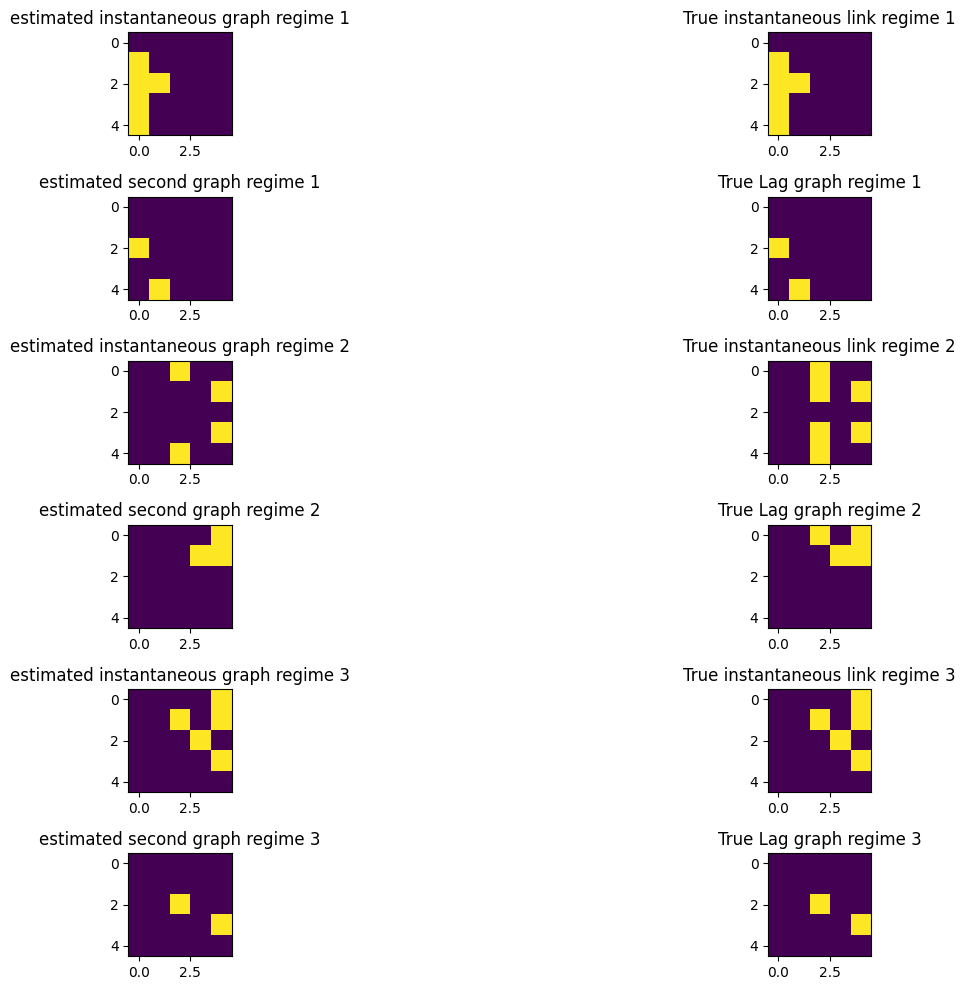

In [26]:
plt_fig(3,g_list,L,5)

# Generate non-linear SEM:

In [2]:
g_list,df_total, intra_nodes, inter_nodes = simulate_regime_MTS(regime= 3,
                                                            func_l = [np.tanh, np.tanh, np.tanh],
                                                            num_nodes = 10,
                                                            n_samples= [400,300,500],
                                                            p = 1,
                                                            degree_intra = 4,
                                                            degree_inter = 1,
                                                            graph_type_intra = "barabasi-albert",
                                                            graph_type_inter = "erdos-renyi",
                                                            sem_type = "linear-gauss",
                                                            noise_scale = 1,
                                                            ANM_type = "Non-Linear",
                                                            max_data_gen_trials= 1000,
                                                                           )

In [3]:
n_nodes = 10
lag = False
if lag == True:
            rearange_intra = [str(i)+"_lag0" for i in range(n_nodes)]
            rearange_inter1 = [str(i)+"_lag1" for i in range(n_nodes)]
            rearange_inter2 = [str(i)+"_lag2" for i in range(n_nodes)]
            rearange_inter = rearange_inter1 + rearange_inter2
else:
            rearange_intra = [str(i)+"_lag0" for i in range(n_nodes)]
            rearange_inter = [str(i)+"_lag1" for i in range(n_nodes)]

# Run non linear CASTOR:

In [6]:
X_syn = df_total[rearange_intra].to_numpy()
X_lag_syn = df_total[rearange_inter].to_numpy()
data = pd.DataFrame(X_syn)
castor = CASTOR(data, X_syn, X_lag_syn, lags = 2)

In [7]:
gamma_hat, model_n =  castor.run_nonlinear(6,0.7,200,torch.device('cuda:0'),150)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


[200. 200. 200. 200. 200. 200.] iter: 0 , p: [177.44229 198.74371 198.79794 199.90695 201.92906 223.18001]
[181. 206. 258. 204. 276.] iter: 1 , p: [164.51686 205.25049 257.67334 206.21663 291.2288 ]
[160. 228. 305. 155. 352.] iter: 2 , p: [127.51497 227.16472 305.24963 163.75415 376.31653]
[305. 302. 451.] iter: 3 , p: [262.0886  301.43192 493.41193]
[378. 303. 519.] iter: 4 , p: [259.1235  302.87152 638.005  ]
[362. 288. 550.] iter: 5 , p: [256.7214  287.95917 655.31946]


In [14]:
lags = 2
reg_num = 3
n_nodes = 10
L = np.zeros((lags*n_nodes, lags*n_nodes, reg_num))
for i,class_idx in enumerate(np.array([0,1,2])):
            L[:n_nodes, :n_nodes, i] = np.array((abs(model_n[class_idx].W_no_thres)>0.2).astype(int)) 
            L[n_nodes:lags*n_nodes,:n_nodes, i] = (abs(model_n[class_idx].A_no_thres)>0.2).astype(int)

# Plot learned graph and groundtruth:

In [15]:
def plt_fig(reg,g_list,L, node):
            plt.figure(figsize=(18,10))
                        
            for i in range(reg):
                        
                        plt.subplot(2*reg,2,4*i+1)
                        L1 = L[:node,:node,i]

                        plt.imshow(L1)
                        plt.title("estimated instantaneous graph regime "+str(i+1))

                        plt.subplot(2*reg,2,4*i+2)
                        plt.imshow(nx.to_numpy_array(g_list[i])[node:2*node,node:2*node])
                        plt.title("True instantaneous link regime " +str(i+1))

                        plt.subplot(2*reg,2,4*i+3)
                        L1 = L[node:2*node,:node,i]

                        plt.imshow(L1)
                        plt.title("estimated second graph regime "+str(i+1))

                        plt.subplot(2*reg,2,4*i+4)
                        plt.imshow(nx.to_numpy_array(g_list[i])[:node,node:2*node])
                        plt.title("True Lag graph regime "+str(i+1))
            plt.tight_layout()

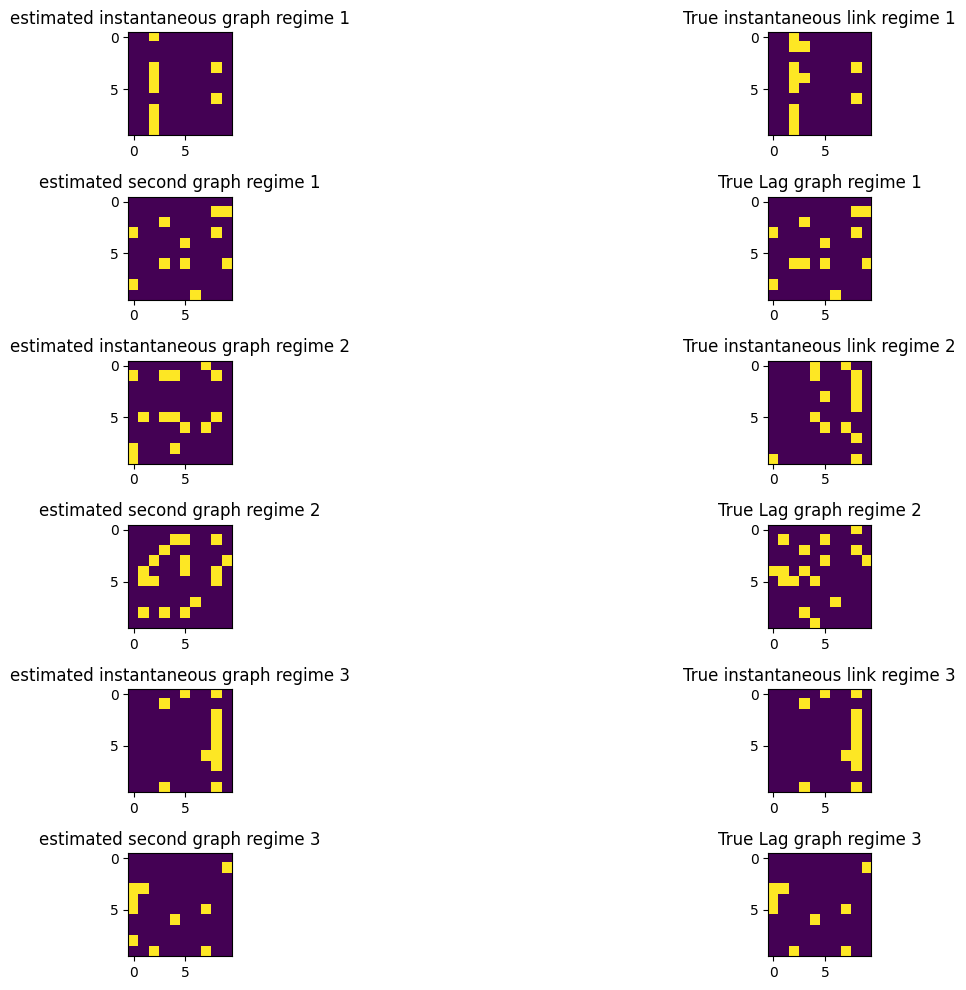

In [16]:
plt_fig(3,g_list,L, 10)